Here, the outcome variable is Happiness.

You are to create machine learning models to predict happiness, but you must first cluster the variables X1 to X6.

These variables are genetic factors - cluster them, create a categorical variable called "clusters", and use clusters, along with the remaining variables (age, salary and married) to develop all applicable machine learning models to predict happiness.

You must over/undersample IF it is necessary - but if not necessary, points will be deducted if done.

In [5]:
import pandas as pd
# Install necessary libraries
!pip install scikit-learn

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns


#import the standard
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#import pre-processing
from sklearn.metrics import pairwise as p
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

#import KMEANs Clustering
from sklearn.cluster import KMeans

#import H Clustering
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster


In [52]:
df = pd.read_csv('/content/Updated_Dataset.csv')
display(df.describe())
display(df.info())


,X1,X2,X3,X4,X5,X6,age,salary,Married,Happiness
count,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,-0.003458,0.006481,0.002590,-0.006021,-0.010387,0.002466,43.953250,60117.589542,0.511250,0.524625
std,1.007213,0.999173,0.995514,0.994328,1.004459,0.997427,15.267922,14842.436818,0.499905,0.499424
min,-3.688365,-3.922400,-3.856375,-3.532818,-4.465604,-4.295391,18.000000,30000.000000,0.000000,0.000000
25%,-0.677723,-0.659367,-0.684179,-0.683381,-0.704956,-0.667869,31.000000,49716.431077,0.000000,0.000000
50%,-0.006783,0.009311,0.005432,-0.000312,-0.009868,0.005404,44.000000,60084.066265,1.000000,1.000000
75%,0.672646,0.673440,0.687472,0.675445,0.671079,0.684116,57.000000,70461.074848,1.000000,1.000000
max,3.926238,4.479084,3.942331,3.691625,3.727833,3.536532,70.000000,116180.688400,1.000000,1.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   X1         8000 non-null   float64
 1   X2         8000 non-null   float64
 2   X3         8000 non-null   float64
 3   X4         8000 non-null   float64
 4   X5         8000 non-null   float64
 5   X6         8000 non-null   float64
 6   age        8000 non-null   int64  
 7   salary     8000 non-null   float64
 8   Married    8000 non-null   int64  
 9   Happiness  8000 non-null   int64  
dtypes: float64(7), int64(3)
memory usage: 625.1 KB


None

In [43]:
# Calculate the percentage of rows with at least one missing value
rows_with_missing_values = df.isnull().any(axis=1).sum()
percentage_missing = (rows_with_missing_values / len(df)) * 100
print(f"Percentage of rows with at least one missing value: {percentage_missing:.2f}%")


# Drop rows with any missing values
df_dropped = df.dropna()


# Standardize the genetic features (X1 to X6)
genetic_features = df[['X1', 'X2', 'X3', 'X4', 'X5', 'X6']]
scaler = StandardScaler()
genetic_scaled = scaler.fit_transform(genetic_features)


Percentage of rows with at least one missing value: 0.00%


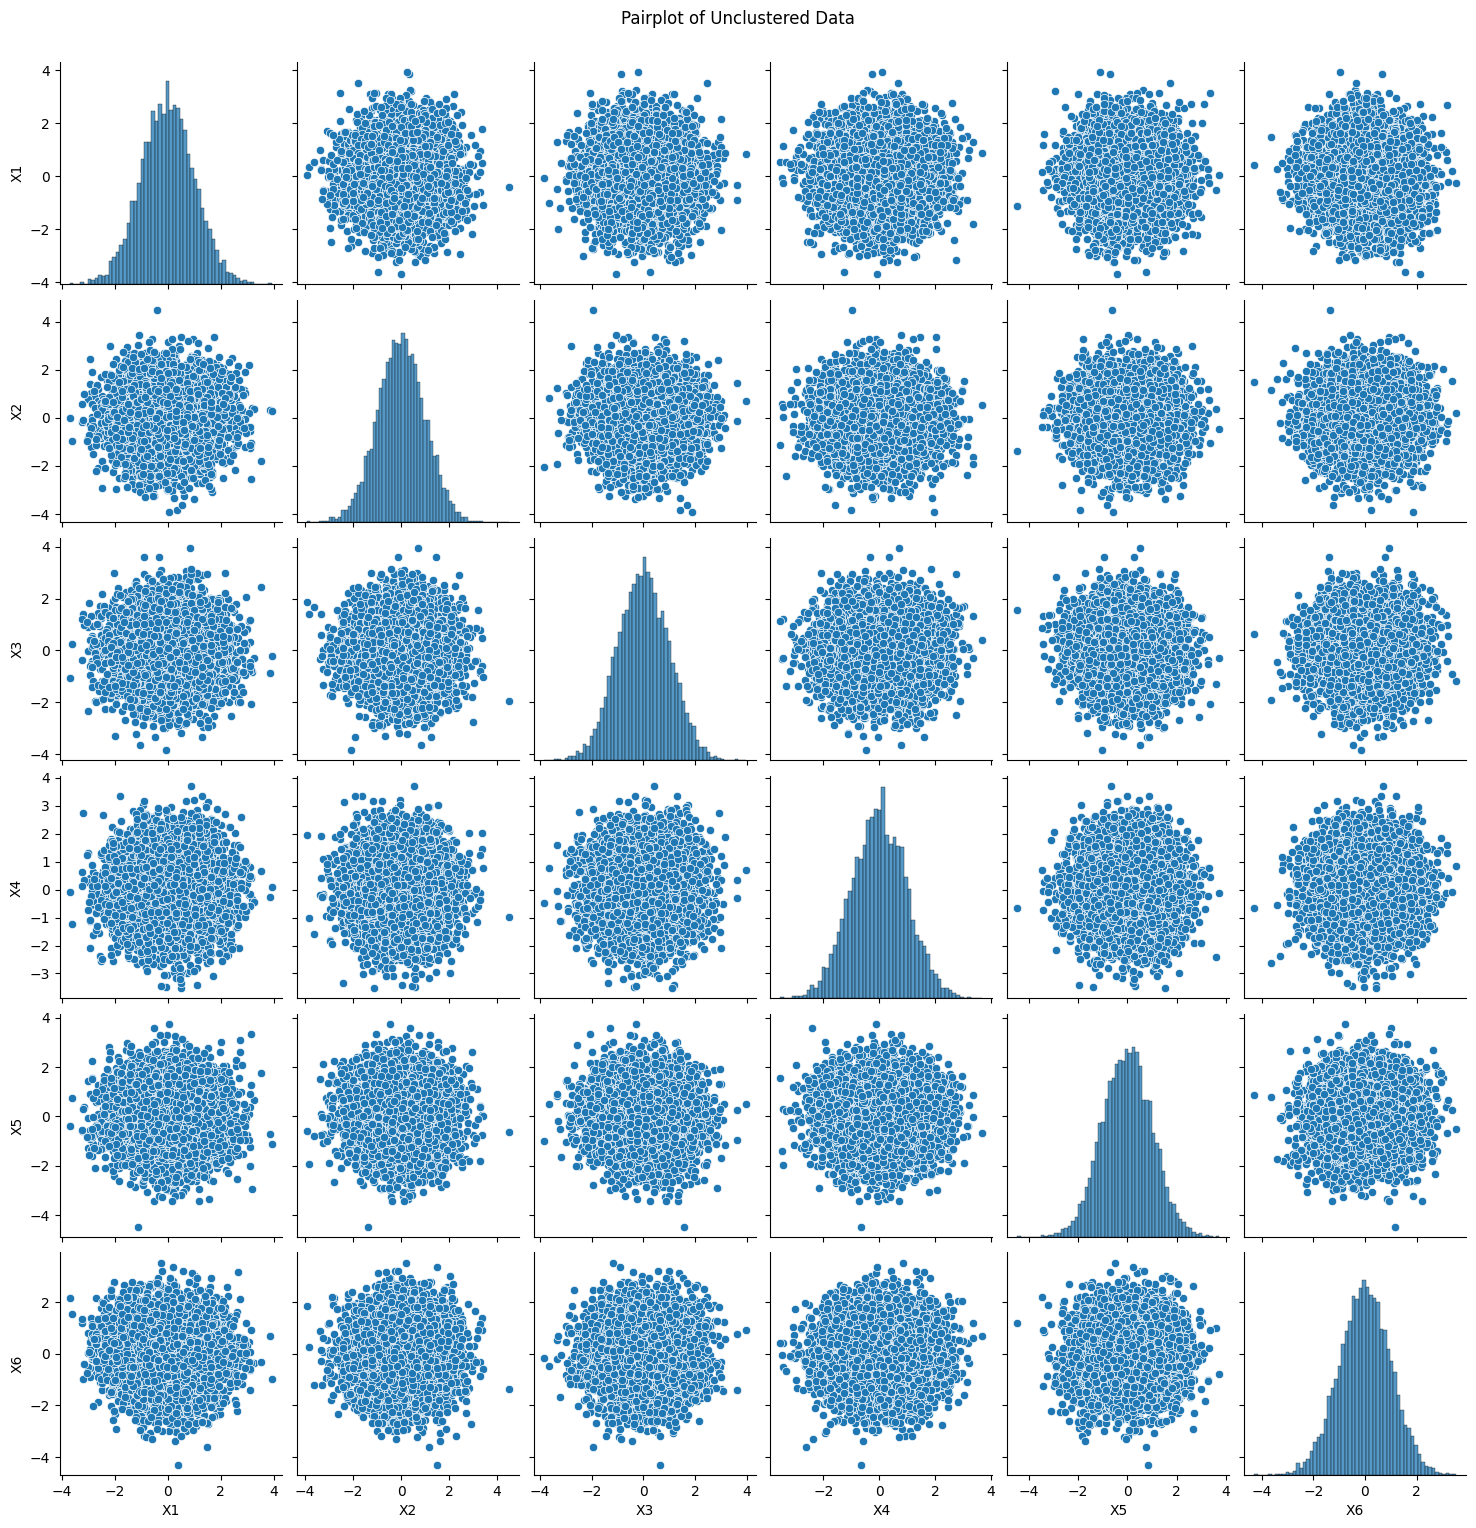

In [69]:
# Pairplot
sns.pairplot(genetic_features, vars=['X1', 'X2', 'X3', 'X4', 'X5', 'X6'])
plt.suptitle("Pairplot of Unclustered Data", y=1.02)
plt.show()

<ipython-input-8-9b4f75c72260>:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


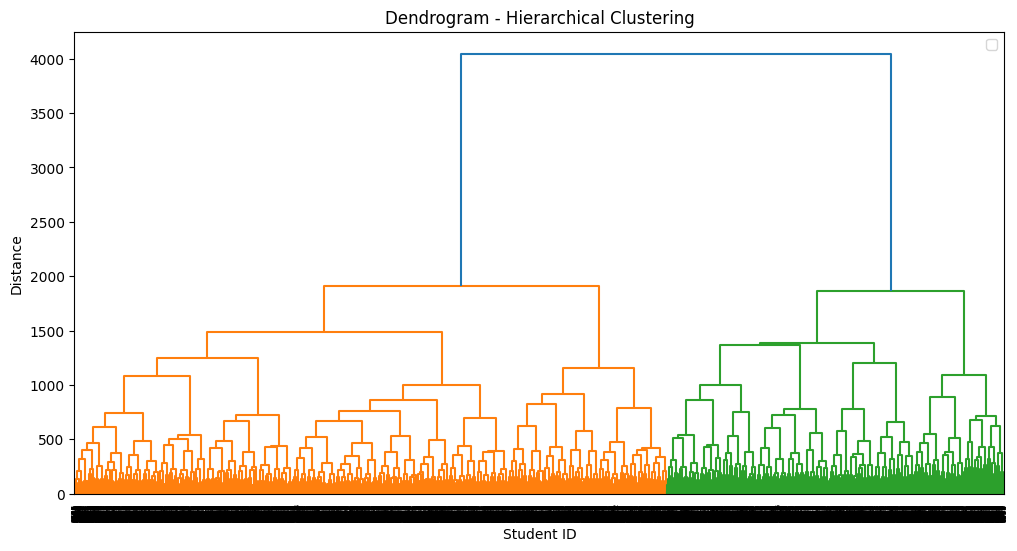




We can see in the above dendrogram that there are distinct clusters based on the silhouette score and linkage threshold. Therefore, we will set our K equal to.


In [8]:
# Computer the pair wise distances and indicate the distance metric used. Euclidian is the default.
from sklearn.metrics import pairwise as p

distances = p.pairwise_distances(genetic_features, metric='euclidean')   # this is returned as a numpy array, will not check this

# Compute hierarchical clustering
mergings = linkage(distances, method='ward')

# Plot dendrogram
plt.figure(figsize=(12, 6))
dendrogram(mergings, distance_sort='descending')
plt.title('Dendrogram - Hierarchical Clustering')
plt.xlabel('Index Number')
plt.ylabel('Distance')
plt.legend()
plt.show()


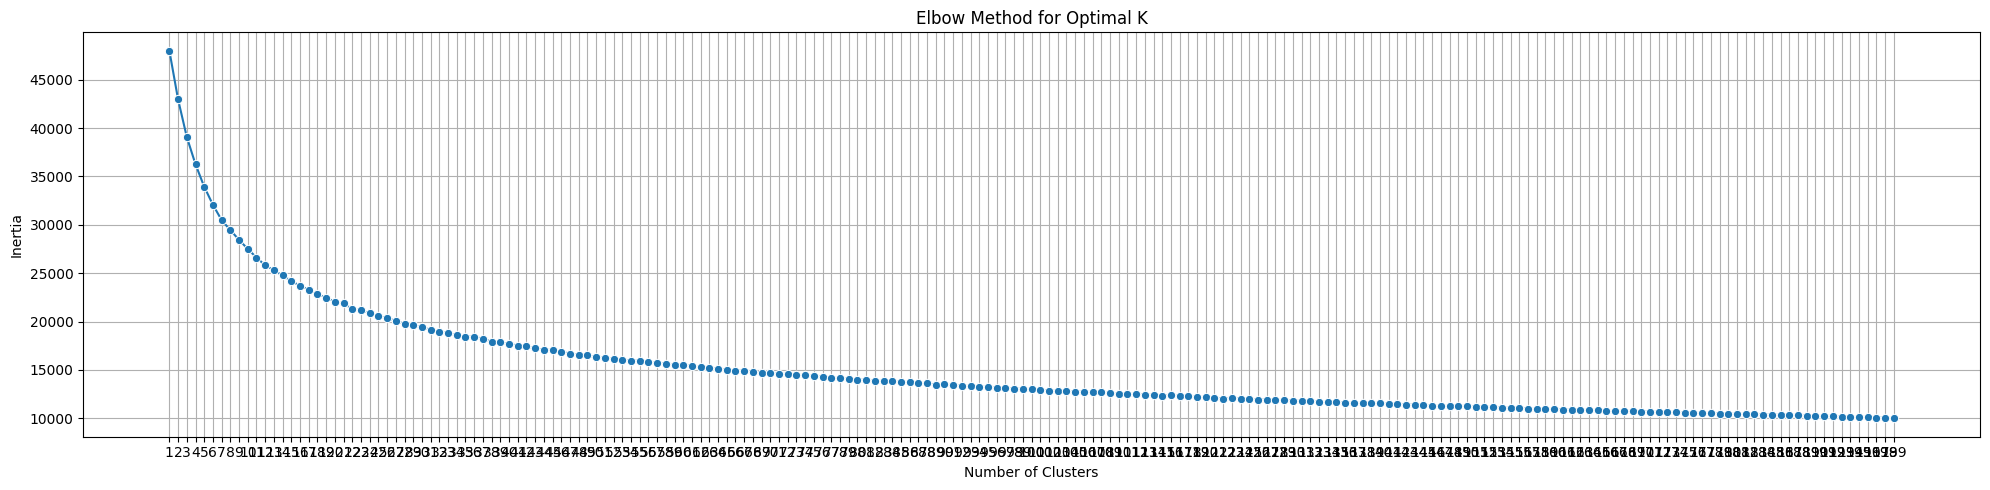

In [13]:


# Use the elbow method to find the optimal number of clusters
inertia = []
k_range = range(1, 200)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(genetic_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(20, 5))
sns.lineplot(x=k_range, y=inertia, marker="o")
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.xticks(k_range)
plt.grid(True)
plt.tight_layout()
plt.show()


In [53]:
kmeans = KMeans(n_clusters=7, random_state=42)
kmeans.fit(genetic_scaled)

KMeans(n_clusters=7, random_state=42)

         X1        X2        X3        X4        X5        X6  age  \
0  0.496714 -0.033025  0.879307 -0.671374  0.732014 -0.471858   37   
1 -0.138264 -0.503650  0.039309 -0.713799 -1.611566  1.012702   37   
2  0.647689 -0.172375 -0.912326  1.425406 -0.676346 -0.198187   29   
3  1.523030  0.714732 -0.462499  1.864414 -1.368048  0.090569   34   
4 -0.234153  1.277857  0.342853 -0.928882  0.189301  0.717391   38   

        salary  Married  Happiness  clusters  
0  59944.87591        1          1         1  
1  84392.78083        1          1         3  
2  46288.18573        0          1         4  
3  56447.87151        0          1         4  
4  50846.83418        1          1         6  


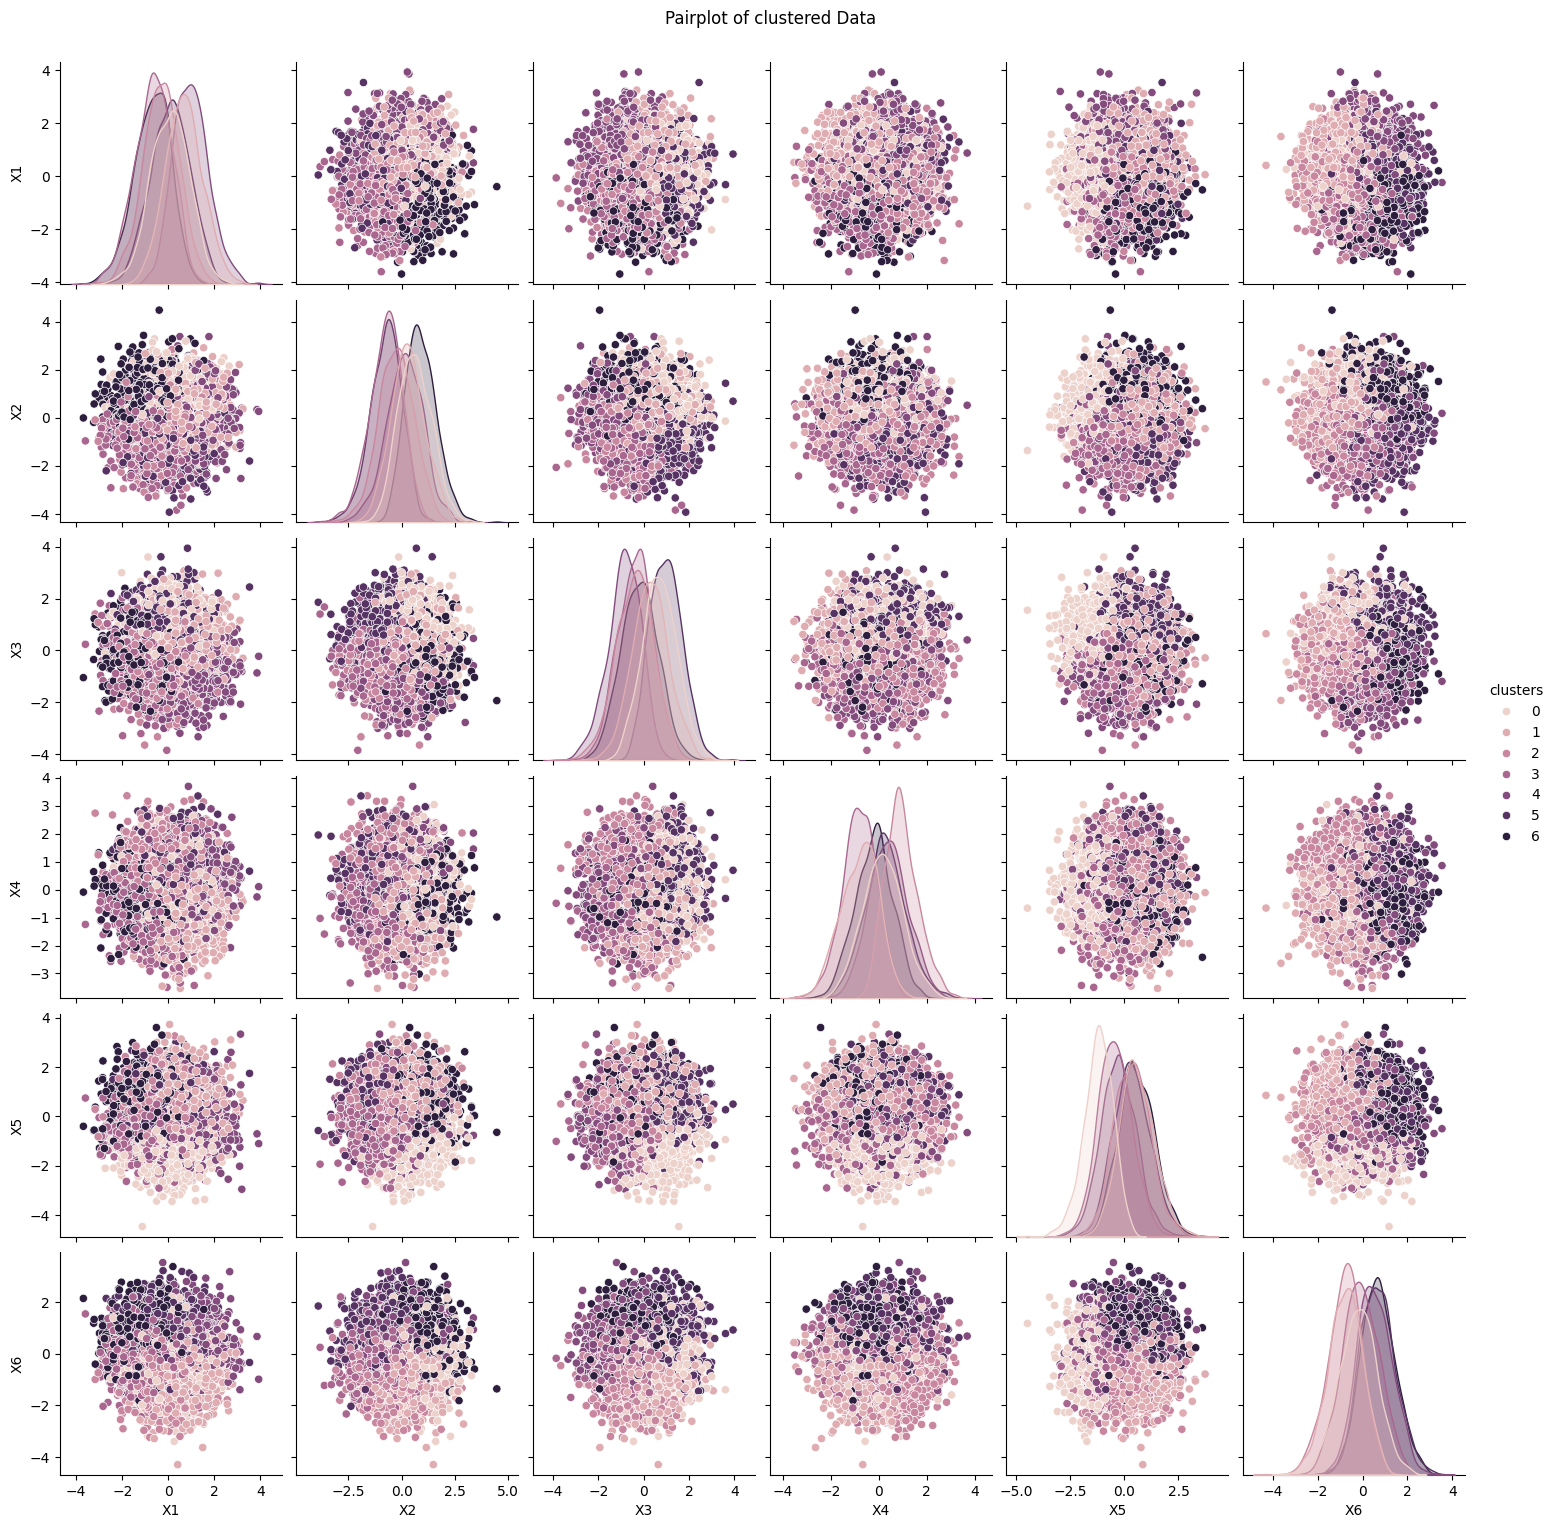

In [72]:
# create clusters from the genetic data with a k of 7

# Get cluster labels
df['clusters'] = kmeans.labels_
genetic_features['clusters'] = kmeans.labels_

# Display the first few rows to show the new 'clusters' column
print(df.head())

# Pairplot
sns.pairplot(genetic_features, vars=['X1', 'X2', 'X3', 'X4', 'X5', 'X6'], hue='clusters')
plt.suptitle("Pairplot of clustered Data", y=1.02)
plt.show()


In [55]:

# Create a list of columns to keep
columns_to_keep = ['clusters', 'age', 'salary', 'Married', 'Happiness']

# Drop columns not in the list
df_cluster = df[columns_to_keep]

# Display the modified DataFrame
print(df_cluster.head())


   clusters  age       salary  Married  Happiness
0         1   37  59944.87591        1          1
1         3   37  84392.78083        1          1
2         4   29  46288.18573        0          1
3         4   34  56447.87151        0          1
4         6   38  50846.83418        1          1


In [56]:
# prompt: show the percetnage of happiness

# Calculate the percentage of happy people
happy_percentage = (df_cluster['Happiness'].sum() / len(df)) * 100
print(f"Percentage of happy people: {happy_percentage:.2f}%")

print('dataset is balanced, do not under or over sample')


Percentage of happy people: 52.46%
dataset is balanced, do not under or over sample


In [57]:
# Perform one-hot encoding on the 'clusters' column
df_dum = pd.get_dummies(df_cluster, columns=['clusters'], drop_first=True)

# Display the first few rows of the modified DataFrame
print(df_dum.head())

df_cluster= df_dum.rename(columns={'Happiness': 'target'})


   age       salary  Married  Happiness  clusters_1  clusters_2  clusters_3  \
0   37  59944.87591        1          1        True       False       False   
1   37  84392.78083        1          1       False       False        True   
2   29  46288.18573        0          1       False       False       False   
3   34  56447.87151        0          1       False       False       False   
4   38  50846.83418        1          1       False       False       False   

   clusters_4  clusters_5  clusters_6  
0       False       False       False  
1       False       False       False  
2        True       False       False  
3        True       False       False  
4       False       False        True  


In [65]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, Normalizer
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, accuracy_score, recall_score, precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier

from imblearn.pipeline import Pipeline as ImbPipeline


# define X and y
X = df_cluster.drop('target', axis=1)
y = df_cluster['target']


# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()


# Preprocessing
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numerical_cols),  # Scale numeric features
    ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_cols)  # One-hot encode categorical features
])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

# Models to evaluate
models = {
    'Logistic Regression': LogisticRegression(),
    'Logistic Regression - penalty = l1, solver = liblinear': LogisticRegression(penalty='l1', solver='liblinear'),
    'Logistic Regression - penalty = l2, solver = liblinear': LogisticRegression(penalty='l2', solver='liblinear'),
    'Logistic Regression - solver = lbfgs': LogisticRegression(penalty='l2', solver='lbfgs'),
    'Random Forest': RandomForestClassifier(),
    'Random Forest - minsamples = 10%, maxdepth = 10': RandomForestClassifier(min_samples_split=0.1, max_depth=10),
    'Random Forest - minsamples = 1%, maxdepth = 10': RandomForestClassifier(min_samples_split=0.01, max_depth=10),
    'Random Forest - minsamples = 1%, maxdepth = 20': RandomForestClassifier(min_samples_split=0.01, max_depth=20),
    'Random Forest - minsamples = 1%, maxdepth = 50': RandomForestClassifier(min_samples_split=0.01, max_depth=50),
    'Random Forest - minsamples = 20%': RandomForestClassifier(min_samples_split=0.2),
    'Random Forest - minsamples = 20%, maxdepth = 5': RandomForestClassifier(min_samples_split=0.2, max_depth=5),
    'Random Forest - minsamples = 20%, maxdepth = 10': RandomForestClassifier(min_samples_split=0.2, max_depth=10),
    'KNN-5': KNeighborsClassifier(n_neighbors=5),
    'KNN-6': KNeighborsClassifier(n_neighbors=6),
    'KNN-7': KNeighborsClassifier(n_neighbors=7),
    'KNN-8': KNeighborsClassifier(n_neighbors=8),
    'SVM-Linear, Minority Weighted': SVC(kernel = 'linear', class_weight={0: 0.5, 1: 1}),
    'SVM-RBF': SVC(probability=True, kernel='rbf'),
    'Neural Network - MI = 800, Activation = ReLu': MLPClassifier(max_iter=800),
    'Neural Network - MI = 800, Activation = Logisitic': MLPClassifier(max_iter=800, activation = 'logistic'),
    'DecisionTree (max_depth=3)': DecisionTreeClassifier(max_depth=3),
    'DecisionTree (max_depth=5)': DecisionTreeClassifier(max_depth=5),
    'DecisionTree (min_samples_split=20)': DecisionTreeClassifier(min_samples_split=20),
    'DecisionTree (max_features="sqrt")': DecisionTreeClassifier(max_features="sqrt"),
    'LDA (No Shrinkage)': LinearDiscriminantAnalysis(solver='lsqr', shrinkage=None),
    'LDA (Shrinkage=0.5)': LinearDiscriminantAnalysis(solver='lsqr', shrinkage=0.5),
    'LDA (Shrinkage=1.0)': LinearDiscriminantAnalysis(solver='lsqr', shrinkage=1.0)
}

# Track results
results = []
trained_models = {}  # To hold the fitted pipeline models

# Loop through each combination of model and resampling strategy
for model_name, model in models.items():
        steps = [('preprocessor', preprocessor)]  # Start with preprocessing
        steps.append(('normalizer', Normalizer()))  # Add normalizer step
        steps.append(('classifier', model))  # Add classifier

        # Create pipeline and fit model
        pipeline = ImbPipeline(steps=steps)
        pipeline.fit(X_train, y_train)
        y_pred = pipeline.predict(X_test)

        # Save the trained pipeline to the dictionary
        model_key = f"{model_name}"
        trained_models[model_key] = pipeline

        # Evaluate model performance
        acc = accuracy_score(y_test, y_pred)
        precision_0 = precision_score(y_test, y_pred, pos_label=0)  # Precision for class 0
        precision_1 = precision_score(y_test, y_pred, pos_label=1)  # Precision for class 1
        recall_0 = recall_score(y_test, y_pred, pos_label=0)  # Recall for class 0
        recall_1 = recall_score(y_test, y_pred, pos_label=1)  # Recall for class 1
        recall_diff = abs(recall_0 - recall_1)

        results.append({
            'model_key': model_key,
            'Model': model_name,
            'Accuracy': acc,
            'Precision_0': precision_0,
            'Precision_1': precision_1,
            'Recall_0': recall_0,
            'Recall_1': recall_1,
            'Recall_Diff': recall_diff
        })

        # Print out detailed metrics for the current model and resampling strategy
        print(f"\nModel: {model_name}")
        print(f"Accuracy: {acc:.4f}")
        print(f"Precision (class 0): {precision_0:.4f}")
        print(f"Precision (class 1): {precision_1:.4f}")
        print(f"Recall (class 0): {recall_0:.4f}")
        print(f"Recall (class 1): {recall_1:.4f}")
        print(f"Recall Difference: {recall_diff:.4f}")
       # print(classification_report(y_test, y_pred, target_names=['No', 'Yes']))

# Convert results to DataFrame for sorting and display
results_df = pd.DataFrame(results)



Model: Logistic Regression
Accuracy: 0.5475
Precision (class 0): 0.5276
Precision (class 1): 0.5619
Recall (class 0): 0.4652
Recall (class 1): 0.6222
Recall Difference: 0.1570

Model: Logistic Regression - penalty = l1, solver = liblinear
Accuracy: 0.5456
Precision (class 0): 0.5251
Precision (class 1): 0.5607
Recall (class 0): 0.4678
Recall (class 1): 0.6162
Recall Difference: 0.1484

Model: Logistic Regression - penalty = l2, solver = liblinear
Accuracy: 0.5469
Precision (class 0): 0.5268
Precision (class 1): 0.5614
Recall (class 0): 0.4652
Recall (class 1): 0.6210
Recall Difference: 0.1558

Model: Logistic Regression - solver = lbfgs
Accuracy: 0.5475
Precision (class 0): 0.5276
Precision (class 1): 0.5619
Recall (class 0): 0.4652
Recall (class 1): 0.6222
Recall Difference: 0.1570

Model: Random Forest
Accuracy: 0.5162
Precision (class 0): 0.4916
Precision (class 1): 0.5392
Recall (class 0): 0.4980
Recall (class 1): 0.5328
Recall Difference: 0.0347

Model: Random Forest - minsamples

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Model: SVM-Linear, Minority Weighted
Accuracy: 0.5244
Precision (class 0): 0.0000
Precision (class 1): 0.5244
Recall (class 0): 0.0000
Recall (class 1): 1.0000
Recall Difference: 1.0000

Model: SVM-RBF
Accuracy: 0.5544
Precision (class 0): 0.5451
Precision (class 1): 0.5590
Recall (class 0): 0.3811
Recall (class 1): 0.7116
Recall Difference: 0.3305

Model: Neural Network - MI = 800, Activation = ReLu
Accuracy: 0.5500
Precision (class 0): 0.5376
Precision (class 1): 0.5564
Recall (class 0): 0.3850
Recall (class 1): 0.6996
Recall Difference: 0.3146

Model: Neural Network - MI = 800, Activation = Logisitic
Accuracy: 0.5463
Precision (class 0): 0.5331
Precision (class 1): 0.5528
Recall (class 0): 0.3706
Recall (class 1): 0.7056
Recall Difference: 0.3350

Model: DecisionTree (max_depth=3)
Accuracy: 0.5469
Precision (class 0): 0.5225
Precision (class 1): 0.5713
Recall (class 0): 0.5493
Recall (class 1): 0.5447
Recall Difference: 0.0046

Model: DecisionTree (max_depth=5)
Accuracy: 0.5425
Pre

In [68]:
results_df.to_csv('results.csv', index=False) #index=False prevents writing row indices to the file


In [88]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.metrics import make_scorer, recall_score
from imblearn.pipeline import Pipeline as ImbPipeline

# Rank by highest accuracy and smallest recall difference
top_models = results_df.sort_values(by=['Recall_Diff', 'Accuracy'], ascending=[True, False]).head(5)

# Define scoring
scoring = {
    'accuracy': 'accuracy',
    'recall_0': make_scorer(recall_score, pos_label=0),
    'recall_1': make_scorer(recall_score, pos_label=1)
}

cv = StratifiedKFold(n_splits=5, shuffle=True)

# Get the model names as a list of strings instead of a NumPy array
top_configs = top_models['Model'].tolist()

cv_results = []
plot_data = []

print("\n=== 5 Fold - Cross-Validation on Top 5 Models ===")

for model_name in top_configs:
    model = models[model_name] # Now model_name is a string and can be used as a key

    steps = [('preprocessor', preprocessor)]
    steps.append(('normalizer', Normalizer()))
    steps.append(('classifier', model))

    pipeline = ImbPipeline(steps=steps)
    print(pipeline)


    scores = cross_validate(pipeline, X, y, cv=cv, scoring=scoring)


    mean_acc = scores['test_accuracy'].mean()
    mean_rec0 = scores['test_recall_0'].mean()
    mean_rec1 = scores['test_recall_1'].mean()
    recall_diff = abs(mean_rec0 - mean_rec1)

    print(f"\nModel: {model_name}")
    print(f"Mean Accuracy: {mean_acc:.3f}")
    print(f"Mean Recall (Class 0 - No): {mean_rec0:.3f}")
    print(f"Mean Recall (Class 1 - Yes): {mean_rec1:.3f}")
    print(f"Mean Recall Difference: {recall_diff:.3f}")
    print("-" * 50)

    # Store summary
    cv_results.append({
        'Model': model_name,
        'Mean Accuracy': mean_acc,
        'Mean Recall 0': mean_rec0,
        'Mean Recall 1': mean_rec1,
        'Recall Diff': recall_diff
    })

    # Store all folds for plotting
    for i in range(cv.get_n_splits()):
        plot_data += [
            {'Model': f"{model_name} ", 'Metric': 'Accuracy', 'Score': scores['test_accuracy'][i]},
            {'Model': f"{model_name} ", 'Metric': 'Recall Class 0 (No)', 'Score': scores['test_recall_0'][i]},
            {'Model': f"{model_name} ", 'Metric': 'Recall Class 1 (Yes)', 'Score': scores['test_recall_1'][i]}
        ]




=== 5 Fold - Cross-Validation on Top 5 Models ===
Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age', 'salary', 'Married']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  [])])),
                ('normalizer', Normalizer()),
                ('classifier', DecisionTreeClassifier(max_features='sqrt'))])

Model: DecisionTree (max_features="sqrt")
Mean Accuracy: 0.515
Mean Recall (Class 0 - No): 0.492
Mean Recall (Class 1 - Yes): 0.536
Mean Recall Difference: 0.044
--------------------------------------------------
Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                               

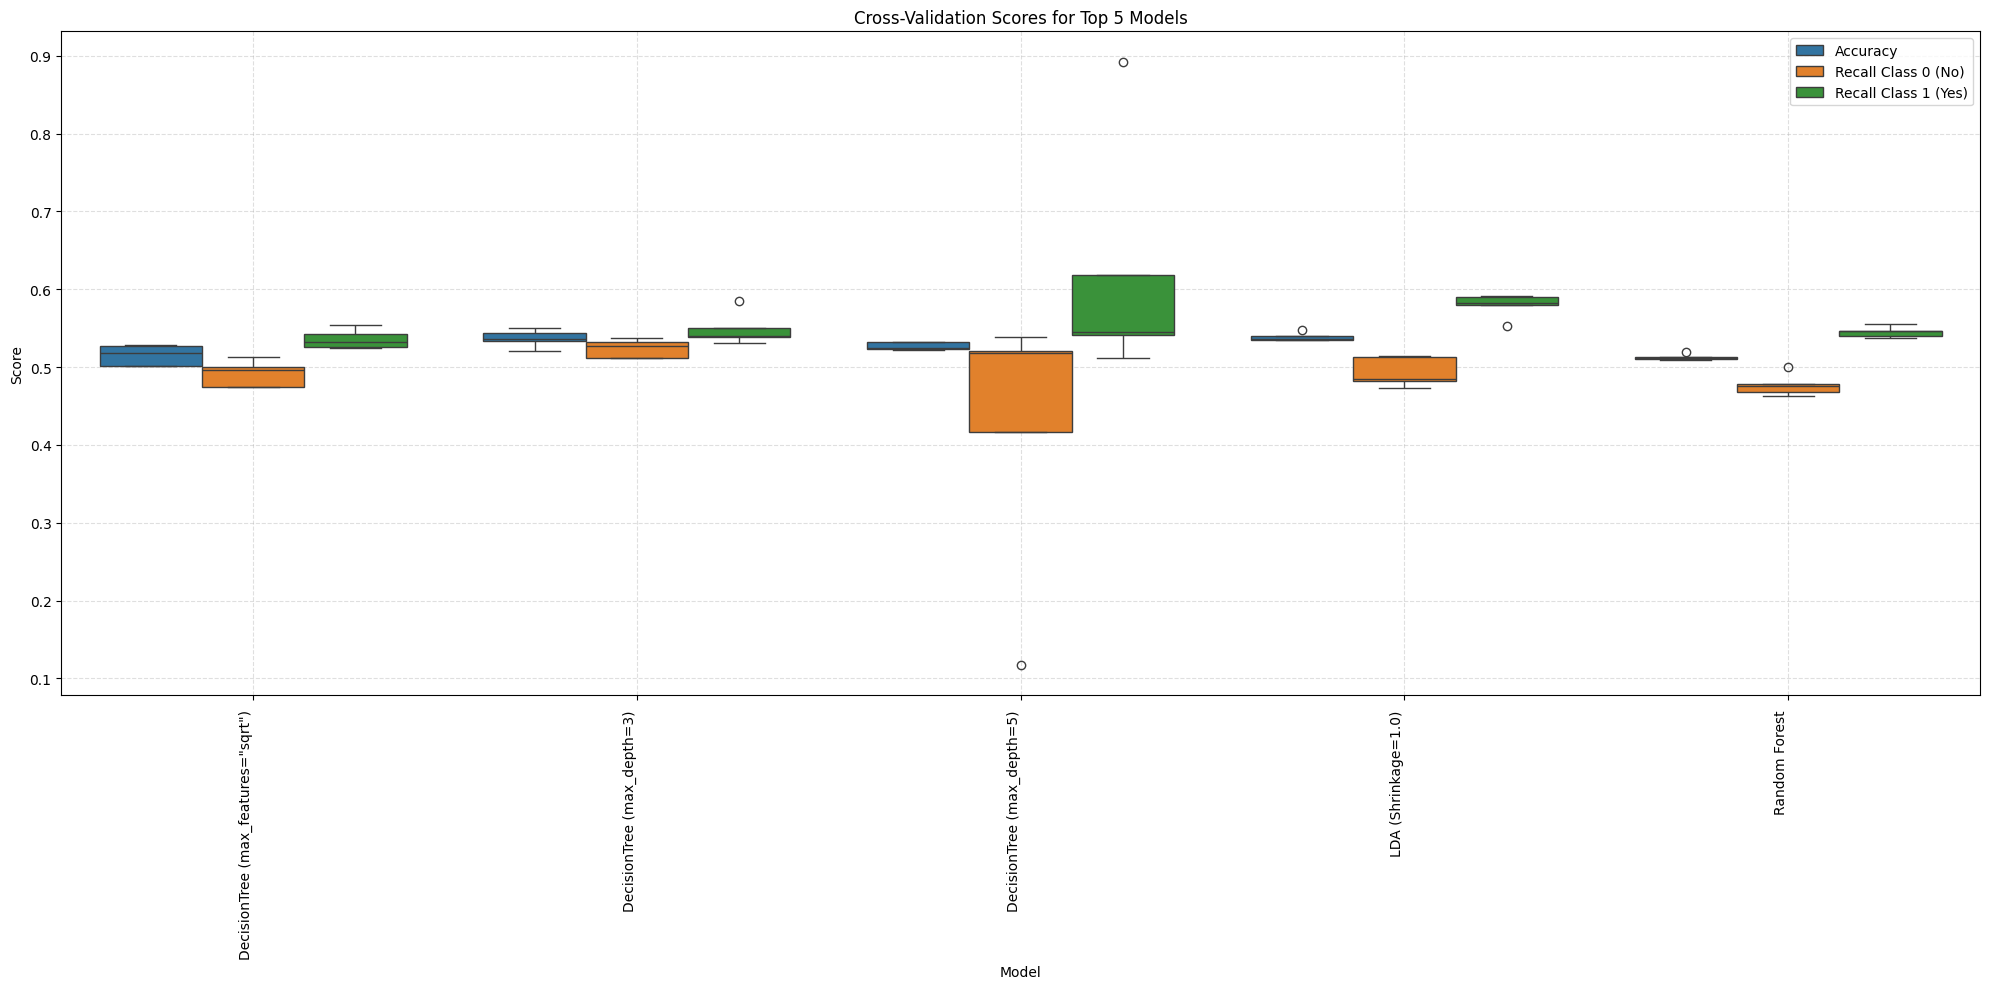

In [89]:
# Plotting
plot_df = pd.DataFrame(plot_data)
plt.figure(figsize=(20, 10))
sns.boxplot(x='Model', y='Score', hue='Metric', data=plot_df)
plt.xticks(rotation=90, ha='right')
plt.title("Cross-Validation Scores for Top 5 Models")
plt.tight_layout()
plt.legend(loc='upper right')
plt.grid(True, linestyle='--', alpha=0.4)
plt.show()